# Data visualization
- [Time-related behaviour: Time series](#time-related-behaviour-time-series)
- [Time-related behaviour: Heat maps](#time-related-behaviour-heat-maps)
- [Distribution behaviour: Histograms](#distribution-behaviour-histograms)
- [Distribution behaviour: Box plots](#distribution-behaviour-box-plots)
- [Relational behaviour: Scatter plots](#relational-behaviour-scatter-plot)
- [Relational behaviour: Pair plots](#relational-behaviour-pair-plots)
- [Relational behaviour: Correlation plots](#relational-behaviour-correlation-plots)

**Dataset used**
- iof_data.csv

In [ ]:
# Mount Google Drive and change directory 
# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/MyDrive/ColabNotebooks/SACAC-EDA-2024/examples

In [2]:
# Import approriate packages and assign with shorthand codes
import pandas as pd # pandas: for data ingestion and manipulation
import numpy as np # numpy: for mathematical and algebraic manipulation
import seaborn as sns # seaborn: for advanced plotting
import matplotlib.pyplot as plt # matplotlib.pyplot: for general plotting
import matplotlib.dates as mdates # matplotlib.dates: for adding dates to plots
from scipy.stats import zscore # function for scaled heatmap

In [3]:
# Import data set
fname = '../data/iof_data.csv' 
date_col = 'date'
df = pd.read_csv(fname,index_col=date_col,parse_dates=[date_col])

In [4]:
# Summary statistics
df.describe().T

count         mean  \
plant.feed.iron.comp                        725760.0    56.283827   
plant.feed.silica.comp                      725760.0    14.663951   
plant.flotation.sump01.starch.flow          725760.0  2871.945204   
plant.flotation.sump01.amina.flow           725760.0   488.434479   
plant.flotation.sump01.discharge.flow       725760.0   397.549714   
plant.flotation.sump01.discharge.ph         725760.0     9.768055   
plant.flotation.sump01.discharge.density    725760.0     1.680238   
plant.flotation.bank01.column01.air.flow    725760.0   280.849302   
plant.flotation.bank01.column02.air.flow    725760.0   277.822398   
plant.flotation.bank01.column03.air.flow    725760.0   281.795065   
plant.flotation.bank01.column04.air.flow    725760.0   299.517907   
plant.flotation.bank01.column05.air.flow    725760.0   299.813377   
plant.flotation.bank01.column06.air.flow    725760.0   292.747812   
plant.flotation.bank01.column07.air.flow    725760.0   291.410588   
plant.flotation.bank01.column01.pulp.level  725760.0   518.382177   
plant.flotation.bank01.column02.pulp.level  725760.0   520.640737   
plant.flotation.bank01.column03.pulp.level  725760.0   529.637693   
plant.flotation.bank01.column04.pulp.level  725760.0   419.461566   
plant.flotation.bank01.column05.pulp.level  725760.0   424.199801   
plant.flotation.bank01.column06.pulp.level  725760.0   428.904576   
plant.flotation.bank01.column07.pulp.level  725760.0   420.184753   
plant.filters.product.iron.comp             725760.0    65.032856   
plant.filters.product.silica.comp           725760.0     2.335933   

                                                    std         min  \
plant.feed.iron.comp                           5.194486   42.740000   
plant.feed.silica.comp                         6.852056    1.310000   
plant.flotation.sump01.starch.flow          1212.782380    0.002026   
plant.flotation.sump01.amina.flow             91.021701  241.669000   
plant.flotation.sump01.discharge.flow          9.742204  376.249000   
plant.flotation.sump01.discharge.ph            0.387240    8.753340   
plant.flotation.sump01.discharge.density       0.068807    1.519820   
plant.flotation.bank01.column01.air.flow      29.207579  175.510000   
plant.flotation.bank01.column02.air.flow      29.779555  175.156000   
plant.flotation.bank01.column03.air.flow      28.085749  176.469000   
plant.flotation.bank01.column04.air.flow       2.532694  292.195000   
plant.flotation.bank01.column05.air.flow       3.570699  286.295000   
plant.flotation.bank01.column06.air.flow      29.982423  189.928000   
plant.flotation.bank01.column07.air.flow      28.426775  185.962000   
plant.flotation.bank01.column01.pulp.level   129.886522  149.218000   
plant.flotation.bank01.column02.pulp.level   127.015686  210.752000   
plant.flotation.bank01.column03.pulp.level   149.999479  126.255000   
plant.flotation.bank01.column04.pulp.level    91.318841  162.201000   
plant.flotation.bank01.column05.pulp.level    84.368405  166.991000   
plant.flotation.bank01.column06.pulp.level    89.864185  155.841000   
plant.flotation.bank01.column07.pulp.level    84.502655  175.349000   
plant.filters.product.iron.comp                1.114215   62.050000   
plant.filters.product.silica.comp              1.127473    0.600000   

                                                    25%          50%  \
plant.feed.iron.comp                          52.610000    56.020000   
plant.feed.silica.comp                         8.870000    13.940000   
plant.flotation.sump01.starch.flow          2082.030000  3024.410000   
plant.flotation.sump01.amina.flow            432.161678   504.527384   
plant.flotation.sump01.discharge.flow        394.193249   399.239000   
plant.flotation.sump01.discharge.ph            9.528270     9.799275   
plant.flotation.sump01.discharge.density       1.647490     1.697340   
plant.flotation.bank01.column01.air.flow     250.340000   299.382000   
plant.flotation.bank01.column02.air.f

# Time-related behaviour: Time series

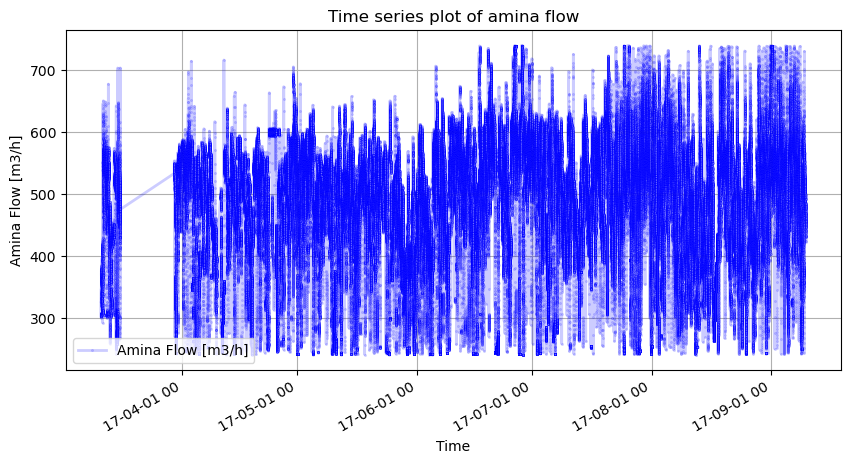

In [5]:
# Time series plot example

# Create axis
fig, ax = plt.subplots(figsize=(10,5))
# - fig = figure object that contains canvas with axes inside
# - ax = axes object that represents single axes for plotting 

# Plot time series
# - Line arguments:
# alpha: transparancy i.e., 0 for fully transparent, 1 for fully opague
# ls / linestyle: i.e., '-' for solid, '--' for dashed, ':' for dotted
# lw / linewidth: e.g., 0.5 for thin, 2 for thick (continuous)
# color: line colour e.g. nome of colour 'blue', or RGB value [0,0,1] and other formats
# marker: marker style i.e., 'o', 'v', '^', 's'
# mec / markeredgecolor: colour specified as above
# mfc / markerfacecolor: colour specified as above
# ms / markersize: colour specified as above
# label: name of line to be used in legend
ax.plot(df['plant.flotation.sump01.amina.flow'],
        alpha=0.2,
        ls = '-', lw=2, color=[0,0,1],
        marker='o',mec='blue',mfc='white',ms=1,
        label='Amina Flow [m3/h]')
ax.set_xlabel('Time')
ax.set_ylabel('Amina Flow [m3/h]')
ax.set_title('Time series plot of amina flow')
ax.grid(True) # adds grid lines
ax.legend(loc='lower left') # adds legend at specific location

# Apply date formatting convention
# - define data format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d %H'))
# - automatic rotation of tick labels to prevent overlapping
fig.autofmt_xdate()

# Save figure
fig.savefig('my_time_series.png',dpi=300) #dpi = dots per inch

Large process datasets (many observations/rows) often results in very crowded plots due to the large number of points, and the high level of noise. To create clearer plots, options include:
- Focus on a smaller period of interest (e.g., a few weeks), limiting the number of observations to around 10000
- Downsample the observations to a longer sampling frequency (e.g., from per minute values to hourly or Downsampled values)

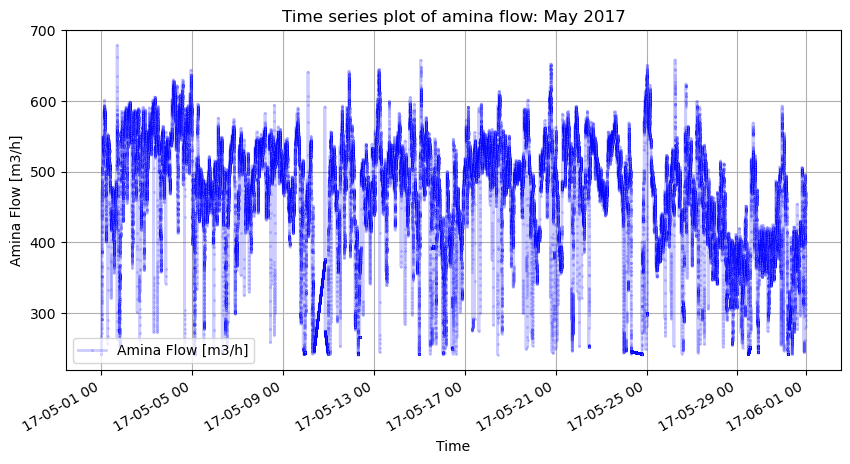

In [6]:
# Time series plot example: smaller period of interest

# Create axis
fig, ax = plt.subplots(figsize=(10,5))

# Plot time series
ax.plot(df.loc[df.index.month==5,'plant.flotation.sump01.amina.flow'], # subset data to May
        alpha=0.2,
        ls = '-', lw=2, color=[0,0,1],
        marker='o',mec='blue',mfc='white',ms=1,
        label='Amina Flow [m3/h]')
ax.set_xlabel('Time')
ax.set_ylabel('Amina Flow [m3/h]')
ax.set_title('Time series plot of amina flow: May 2017')
ax.grid(True) # adds grid lines
ax.legend(loc='lower left') # adds legend at specific location

# Apply date formatting convention
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d %H'))
fig.autofmt_xdate()

In [8]:
# Downsample DataFrame 
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number]).copy()
# Statistics to calculate
def percentile_05(x):
    return x.quantile(0.05)
def percentile_95(x):
    return x.quantile(0.95)
#percentile_05 = lambda x: x.quantile(0.05)
#percentile_05.__name__ = 'percentile_05'
#percentile_95 = lambda x: x.quantile(0.95)
#percentile_95.__name__ = 'percentile_95'
#downsample_df = numeric_df.resample('h').agg(['median', 'max', 'min'])
downsample_df = numeric_df.resample('h').agg(['median', percentile_05, percentile_95])
# Flatten the column index
downsample_df.columns = ['_'.join(col).strip() for col in downsample_df.columns.values]
# Summary statsitics for Downsampled data
downsample_df.describe().T

count       mean       std  \
plant.feed.iron.comp_median                      4032.0  56.283827  5.195127   
plant.feed.iron.comp_percentile_05               4032.0  56.283827  5.195127   
plant.feed.iron.comp_percentile_95               4032.0  56.283827  5.195127   
plant.feed.silica.comp_median                    4032.0  14.663951  6.852901   
plant.feed.silica.comp_percentile_05             4032.0  14.663951  6.852901   
...                                                 ...        ...       ...   
plant.filters.product.iron.comp_percentile_05    4032.0  65.025155  1.124917   
plant.filters.product.iron.comp_percentile_95    4032.0  65.040557  1.105621   
plant.filters.product.silica.comp_median         4032.0   2.335933  1.126693   
plant.filters.product.silica.comp_percentile_05  4032.0   2.325066  1.114159   
plant.filters.product.silica.comp_percentile_95  4032.0   2.346799  1.143349   

                                                   min    25%    50%  \
plant.feed.iron.comp_median                      42.74  52.61  56.02   
plant.feed.iron.comp_percentile_05               42.74  52.61  56.02   
plant.feed.iron.comp_percentile_95               42.74  52.61  56.02   
plant.feed.silica.comp_median                     1.31   8.87  13.94   
plant.feed.silica.comp_percentile_05              1.31   8.87  13.94   
...                                                ...    ...    ...   
plant.filters.product.iron.comp_percentile_05    62.05  64.34  65.19   
plant.filters.product.iron.comp_percentile_95    62.05  64.36  65.21   
plant.filters.product.silica.comp_median          0.60   1.44   2.01   
plant.filters.product.silica.comp_percentile_05   0.60   1.44   2.01   
plant.filters.product.silica.comp_percentile_95   0.60   1.45   2.01   

                                                       75%    max  
plant.feed.iron.comp_median                      59.720000  65.78  
plant.feed.iron.comp_percentile_05               59.720000  65.78  
plant.feed.iron.comp_percentile_95               59.720000  65.78  
plant.feed.silica.comp_median                    19.970000  33.40  
plant.feed.silica.comp_percentile_05             19.970000  33.40  
...                                                    ...    ...  
plant.filters.product.iron.comp_percentile_05    65.840000  68.01  
plant.filters.product.iron.comp_percentile_95    65.840000  68.01  
plant.filters.product.silica.comp_median          3.027791   5.53  
plant.filters.product.silica.comp_percentile_05   3.002500   5.53  
plant.filters.product.silica.comp_percentile_95   3.040000   5.53  

[69 rows x 8 columns]

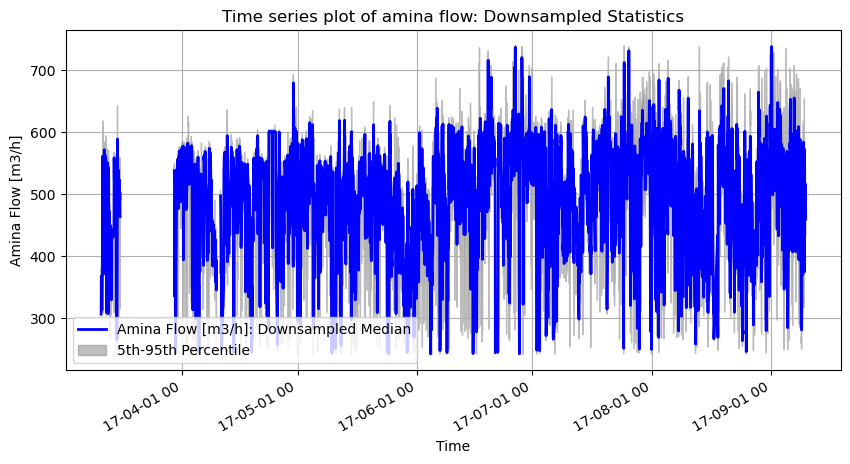

In [9]:
# Time series plot example: downsampled data

# Create axis
fig, ax = plt.subplots(figsize=(10,5))

# Plot time series
ax.plot(downsample_df['plant.flotation.sump01.amina.flow_median'],
        ls = '-', lw=2, color=[0,0,1],
        label='Amina Flow [m3/h]: Downsampled Median')
# Create filled area between min and 95th percentile
ax.fill_between(downsample_df.index, 
                downsample_df['plant.flotation.sump01.amina.flow_percentile_05'], 
                downsample_df['plant.flotation.sump01.amina.flow_percentile_95'], 
                color='gray', alpha=0.5, label='5th-95th Percentile')
# Annotations
ax.set_xlabel('Time')
ax.set_ylabel('Amina Flow [m3/h]')
ax.set_title('Time series plot of amina flow: Downsampled Statistics')
ax.grid(True) # adds grid lines
ax.legend(loc='lower left') # adds legend at specific location

# Apply date formatting convention
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d %H'))
fig.autofmt_xdate()

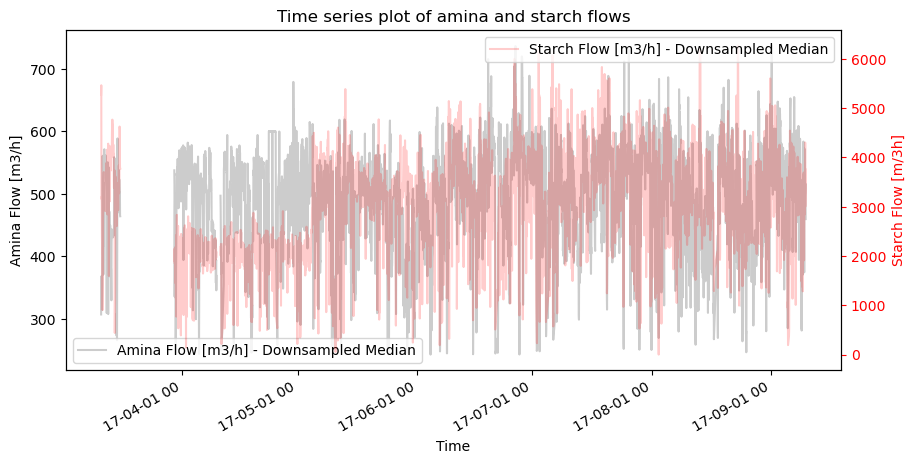

In [10]:
# Time series plot: Two different y-axes
# Create axis
fig, ax = plt.subplots(figsize=(10,5))

# Apply date formatting convention
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d %H'))
fig.autofmt_xdate()

# Plot time series: First set
ax.plot(downsample_df['plant.flotation.sump01.amina.flow_median'],color='black',alpha=0.2,label='Amina Flow [m3/h] - Downsampled Median')

# Plot time series: Second set
ax2 = ax.twinx() # creates a second axes 'ax2' that shares the same x-axis as 'ax'
ax2.plot(downsample_df['plant.flotation.sump01.starch.flow_median'],color='red',alpha=0.2,label='Starch Flow [m3/h] - Downsampled Median')

# Annotations
ax.set_xlabel('Time')
ax.set_ylabel('Amina Flow [m3/h]')
ax.set_title('Time series plot of amina and starch flows')
ax.legend(loc='lower left')

ax2.set_ylabel('Starch Flow [m/3h]')
ax2.legend(loc='upper right')
ax2.yaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='red')

# Notice that you have to add legends separately for 'ax' and 'ax2'


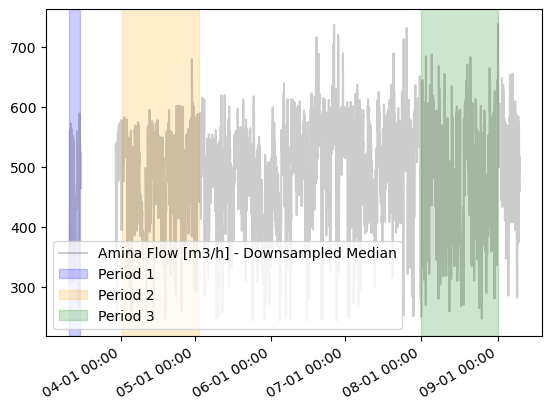

In [11]:
## Time series plot (continued)
# Create axis
fig, ax = plt.subplots()
# Apply date formatting convention
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
fig.autofmt_xdate()
# Plot time series
ax.plot(downsample_df['plant.flotation.sump01.amina.flow_median'],color="black",alpha=0.2,label='Amina Flow [m3/h] - Downsampled Median')
# Add colouring for different time periods
p1start = '2017-03-11 01:00:00'
p1end = '2017-03-15 11:00:00'
p2start = '2017-04-01 12:00:00'
p2end = '2017-05-02 22:00:00'
p3start = '2017-08-01 00:30:00'
p3end = '2017-09-01 04:30:00'
plt.axvspan(xmin=p1start,xmax=p1end,alpha=0.2,color="blue",label="Period 1")
plt.axvspan(xmin=p2start,xmax=p2end,alpha=0.2,color="orange",label="Period 2")
plt.axvspan(xmin=p3start,xmax=p3end,alpha=0.2,color="green",label="Period 3")
plt.legend(loc='lower left')

In [12]:
## Variable group of interest
feed_variables = [
    'plant.flotation.sump01.starch.flow',
    'plant.flotation.sump01.amina.flow',
    'plant.flotation.sump01.discharge.flow',
    'plant.flotation.sump01.discharge.ph',
    'plant.flotation.sump01.discharge.density']
Downsampled_feed_variables = [
    'plant.flotation.sump01.starch.flow_median',
    'plant.flotation.sump01.amina.flow_median',
    'plant.flotation.sump01.discharge.flow_median',
    'plant.flotation.sump01.discharge.ph_median',
    'plant.flotation.sump01.discharge.density_median'
]

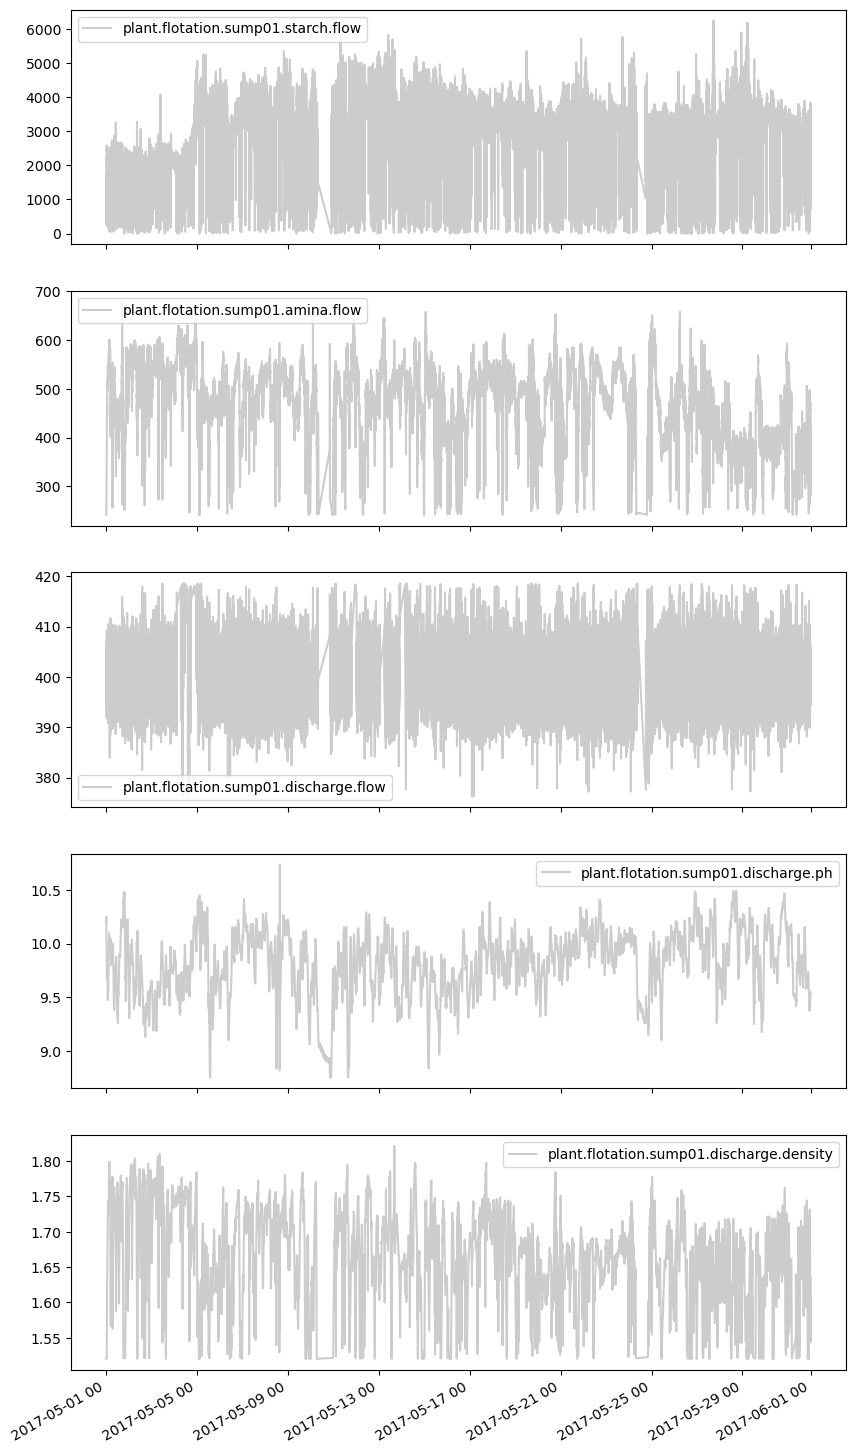

In [13]:
## Time series plots (continued)
# Create subplot axes with five rows and one column for plotting feed variables
fig, ax = plt.subplots(5,1,sharex=True,figsize = (10,20)) 
# sharex = True allows zooming to be shared between plots
# figsize (width, height)
# Apply date formating convention
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H'))
fig.autofmt_xdate()
for ind in range(0,len(feed_variables)):
    ax[ind].plot(df.loc[df.index.month==5,feed_variables[ind]],label=feed_variables[ind],color='black',alpha=0.2)
    ax[ind].legend()


## Time-related behaviour: Heat maps

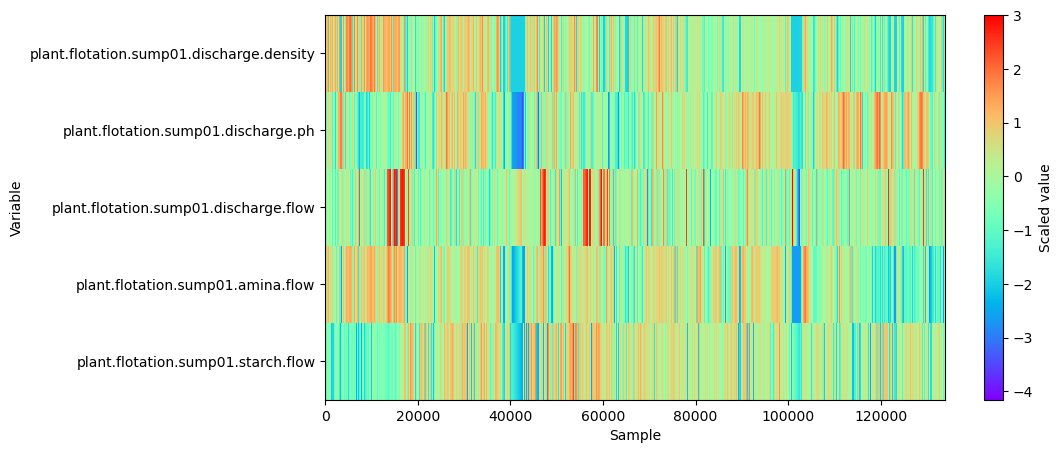

In [14]:
## Time series plots (continued)
# Heatmap of variables over time - scaled
fig, ax = plt.subplots(figsize=(10,5))

# Scaled values (transposed, for time on x-axis)
dfs = df.loc[df.index.month==5,feed_variables].apply(zscore).T

# Heatmap
im = ax.pcolormesh(dfs,cmap='rainbow')

# Variable names
# - location of midpoints
m = len(feed_variables)
y_mid_points = np.linspace(0.5,m-0.5,m)
ax.set_yticks(y_mid_points)
ax.set_yticklabels(feed_variables)
ax.set_ylabel('Variable')

# Sample indicator
ax.set_xlabel('Sample')

# Colorbar
cbar = plt.colorbar(im)
cbar.set_label('Scaled value')

## Distribution behaviour: Histograms

In [15]:
## Add categorical variable that indicates periods
df['Period'] = np.NaN
df.loc[p1start:p1end,'Period'] = 'Period 1'
df.loc[p2start:p2end,'Period'] = 'Period 2'
df.loc[p3start:p3end,'Period'] = 'Period 3'
downsample_df['Period'] = np.NaN
downsample_df.loc[p1start:p1end,'Period'] = 'Period 1'
downsample_df.loc[p2start:p2end,'Period'] = 'Period 2'
downsample_df.loc[p3start:p3end,'Period'] = 'Period 3'

C:\Users\tmlouw\AppData\Local\Temp\ipykernel_33376\389737729.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Period 1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[p1start:p1end,'Period'] = 'Period 1'
C:\Users\tmlouw\AppData\Local\Temp\ipykernel_33376\389737729.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Period 1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  downsample_df.loc[p1start:p1end,'Period'] = 'Period 1'


<Axes: xlabel='plant.flotation.sump01.amina.flow', ylabel='Count'>

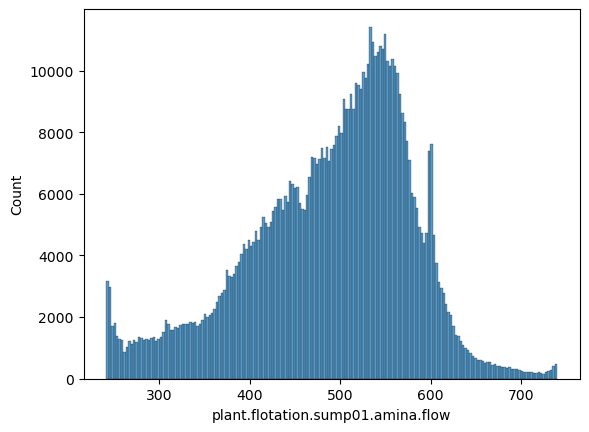

In [16]:
## Histogram (seaborn)
sns.histplot(data = df, x = 'plant.flotation.sump01.amina.flow')

c:\Users\tmlouw\Anaconda3\envs\py3_11\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\tmlouw\Anaconda3\envs\py3_11\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\tmlouw\Anaconda3\envs\py3_11\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\tmlouw\Anaconda3\envs\py3

<Axes: xlabel='plant.flotation.sump01.amina.flow', ylabel='Count'>

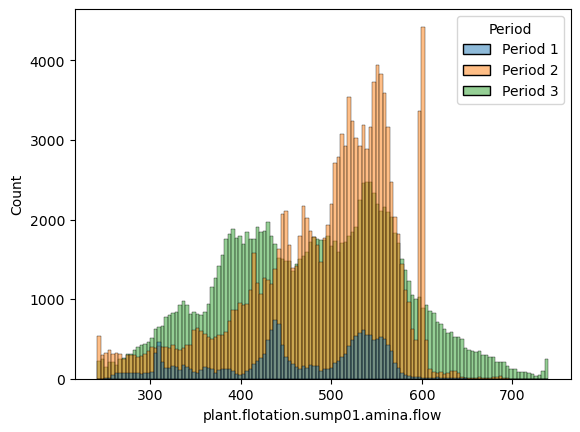

In [17]:
## Histograms with groups (seaborn)
sns.histplot(data=df,x='plant.flotation.sump01.amina.flow',hue="Period")


c:\Users\tmlouw\Anaconda3\envs\py3_11\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\tmlouw\Anaconda3\envs\py3_11\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\tmlouw\Anaconda3\envs\py3_11\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\tmlouw\Anaconda3\envs\py3

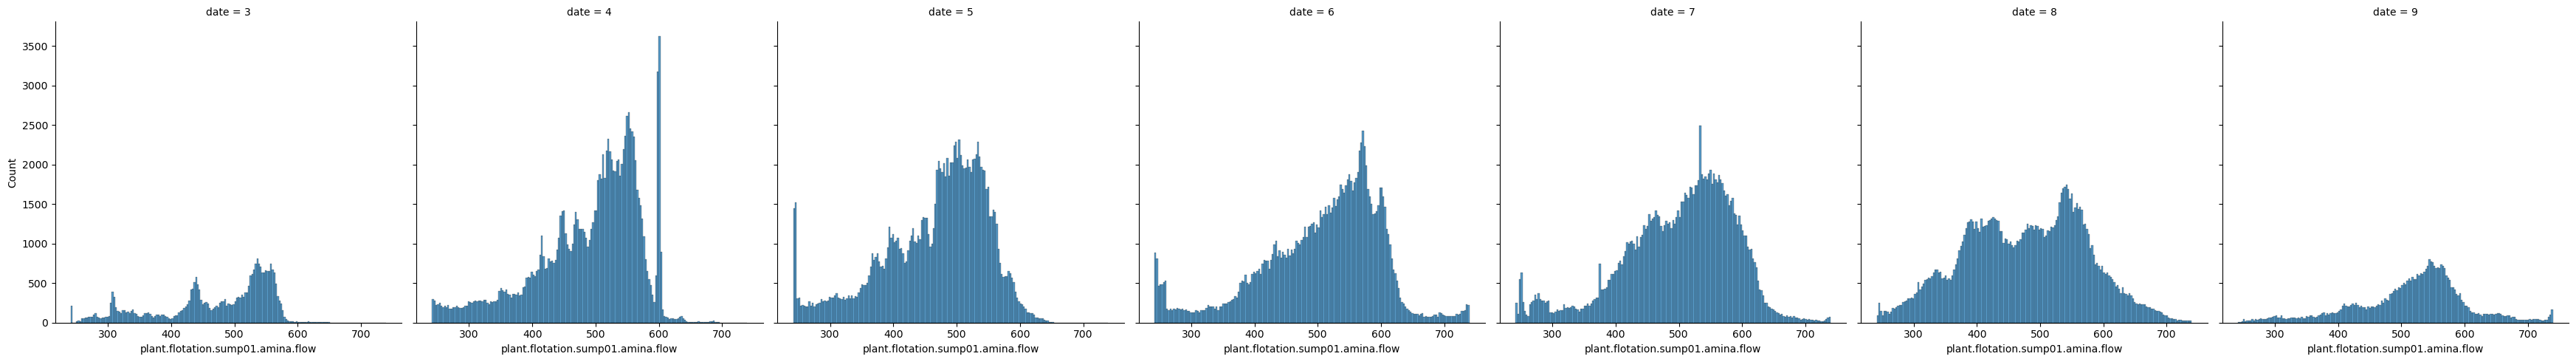

In [18]:
# Histogram with groups - time-based (seaborn)
sns.displot(
    df, x="plant.flotation.sump01.amina.flow", col=df.index.month, 
)

## Distribution behaviour: Box plots

c:\Users\tmlouw\Anaconda3\envs\py3_11\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='plant.flotation.sump01.amina.flow'>

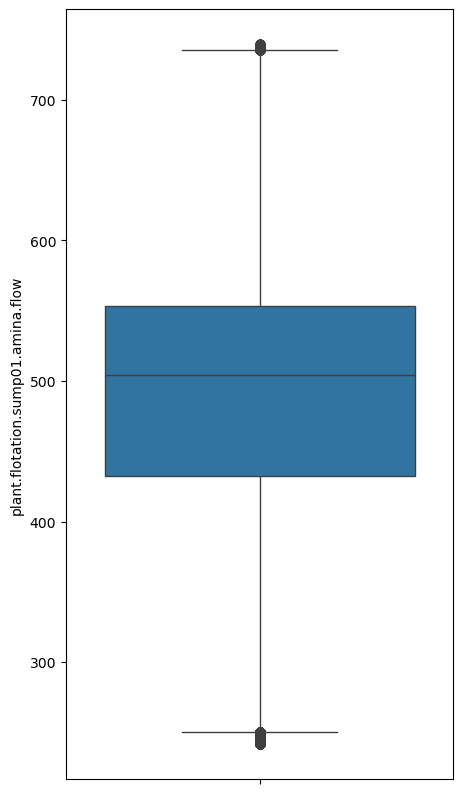

In [19]:
## Box plot (seaborn)
fig = plt.figure(figsize=(5,10))
sns.boxplot(data=df,y='plant.flotation.sump01.amina.flow')

c:\Users\tmlouw\Anaconda3\envs\py3_11\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Period', ylabel='plant.flotation.sump01.amina.flow'>

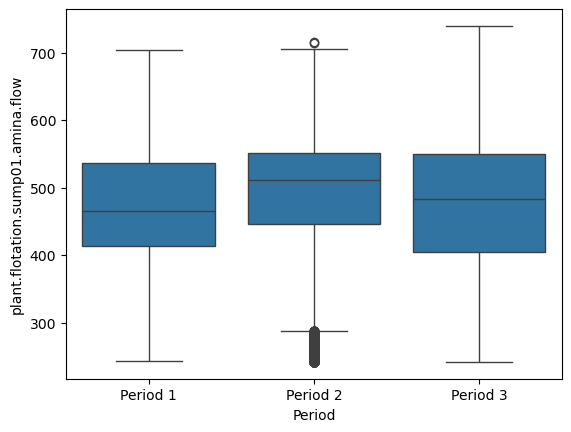

In [20]:
## Box plots per group (seaborn)
sns.boxplot(data=df,y='plant.flotation.sump01.amina.flow',x='Period')


c:\Users\tmlouw\Anaconda3\envs\py3_11\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='plant.flotation.sump01.amina.flow', ylabel='Period'>

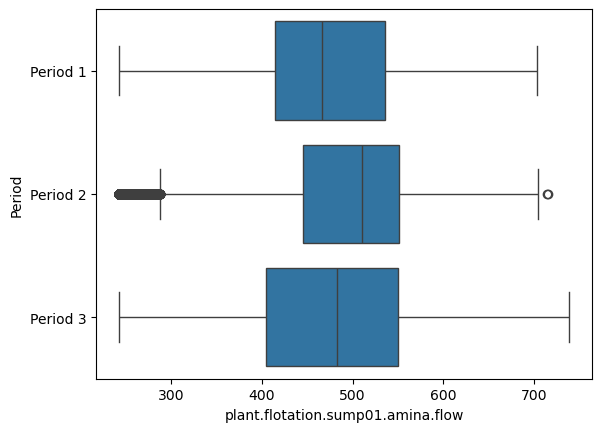

In [21]:
## Box plots per group - horizontal (seaborn)
sns.boxplot(data=df, x='plant.flotation.sump01.amina.flow',y='Period')

## Relational behaviour: Scatter plot

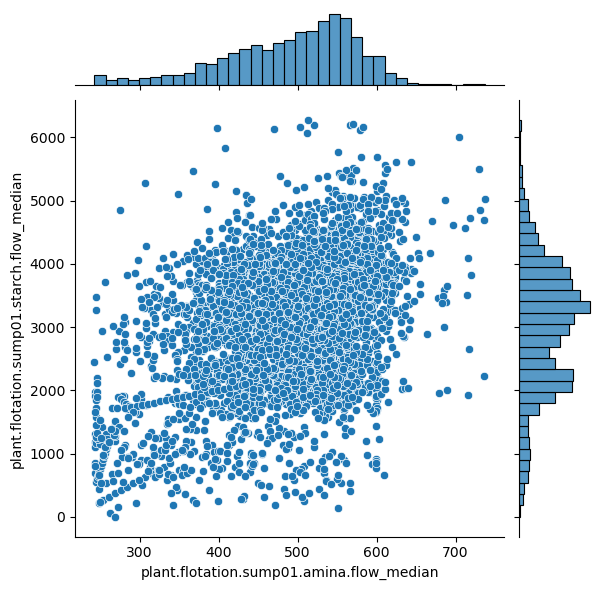

In [22]:
## Scatter plots: Relationship between two variables
# jointplot also provides histograms of individual variables
sns.jointplot(x=downsample_df['plant.flotation.sump01.amina.flow_median'],y=downsample_df['plant.flotation.sump01.starch.flow_median'])


c:\Users\tmlouw\Anaconda3\envs\py3_11\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\tmlouw\Anaconda3\envs\py3_11\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\tmlouw\Anaconda3\envs\py3_11\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\tmlouw\Anaconda3\envs\py3

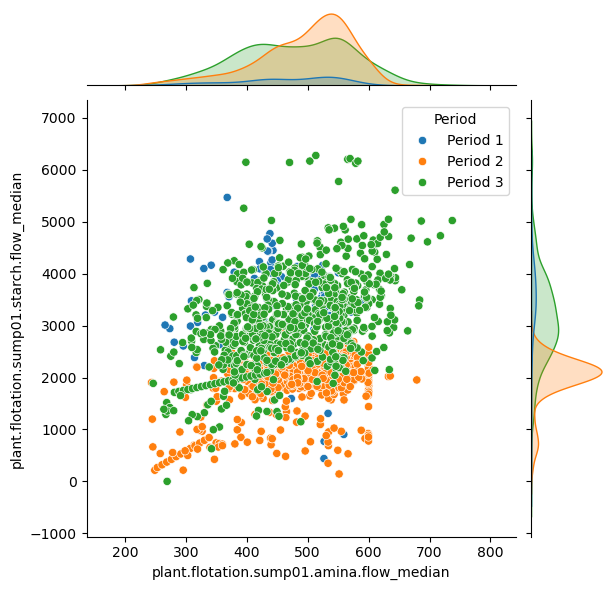

In [23]:
# Scatter plot with hue
sns.jointplot(data = downsample_df,x='plant.flotation.sump01.amina.flow_median',y='plant.flotation.sump01.starch.flow_median',hue='Period')


<Axes: xlabel='plant.flotation.sump01.amina.flow_median', ylabel='plant.flotation.sump01.starch.flow_median'>

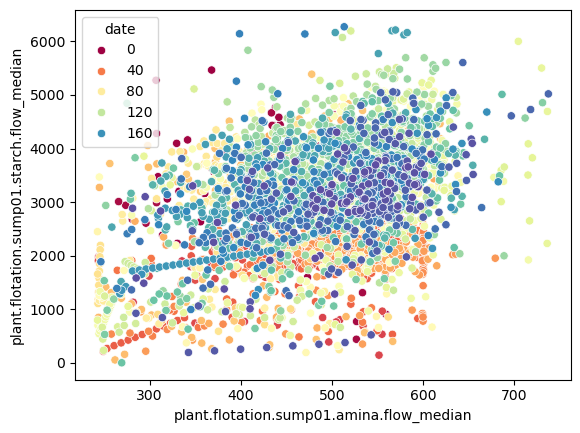

In [24]:
# Scatter plot with hue (indicating passage of time)
sample_number = downsample_df.index - downsample_df.index[0]
sns.scatterplot(
    data = downsample_df,
    x='plant.flotation.sump01.amina.flow_median',
    y='plant.flotation.sump01.starch.flow_median',
    hue=sample_number.days,
    legend="brief", # only gives legend for a few sequential points
    palette='Spectral' # see this link for colormap options https://matplotlib.org/stable/users/explain/colors/colormaps.html
)


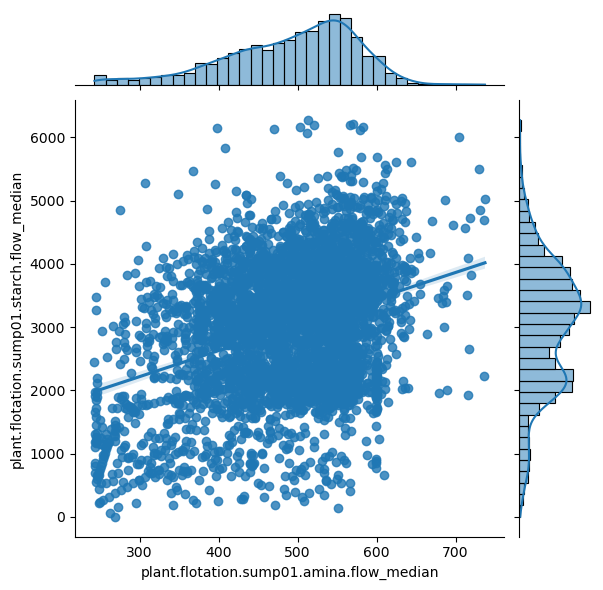

In [25]:
## Scatter plots: Relationship between two variables
# A simple regression line can also be estimated and displayed
sns.jointplot(data = downsample_df,x='plant.flotation.sump01.amina.flow_median',y='plant.flotation.sump01.starch.flow_median',kind='reg')

## Relational behaviour: Pair plots

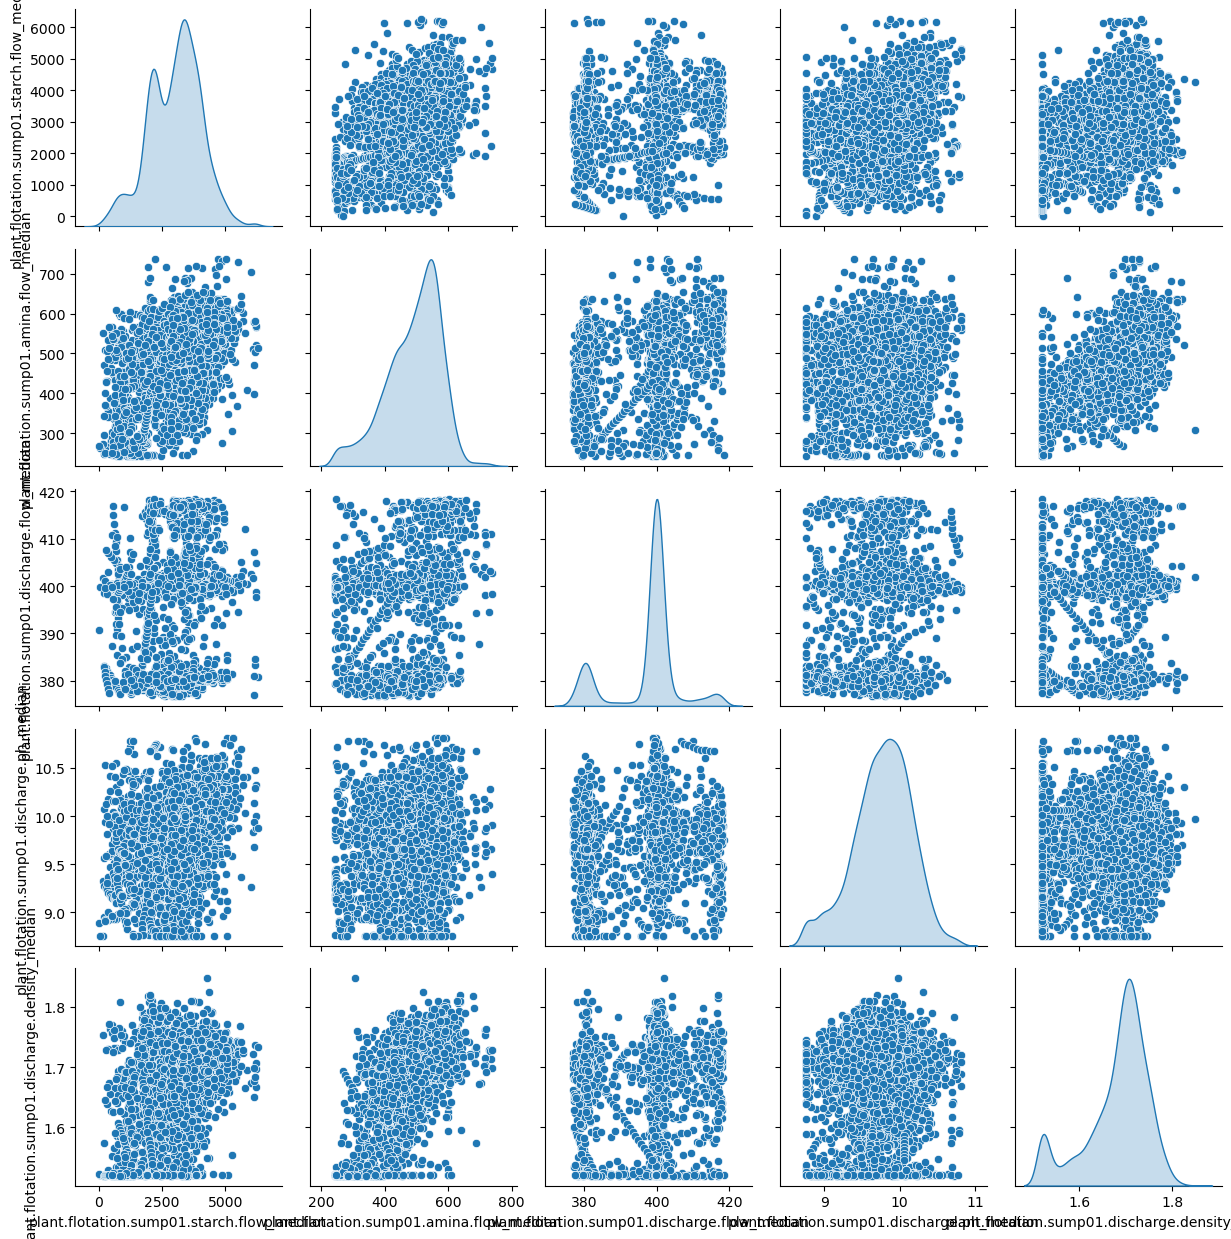

In [26]:
## Pairplots: Overview of all relationships between pairs of variables (continued)
# Kernel density estimate of distribution on diagonal instead
# Subset of variables specified with vars
sns.pairplot(data=downsample_df,vars=Downsampled_feed_variables,diag_kind='kde')
plt.tight_layout()

c:\Users\tmlouw\Anaconda3\envs\py3_11\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\tmlouw\Anaconda3\envs\py3_11\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\tmlouw\Anaconda3\envs\py3_11\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\tmlouw\Anaconda3\envs\py3

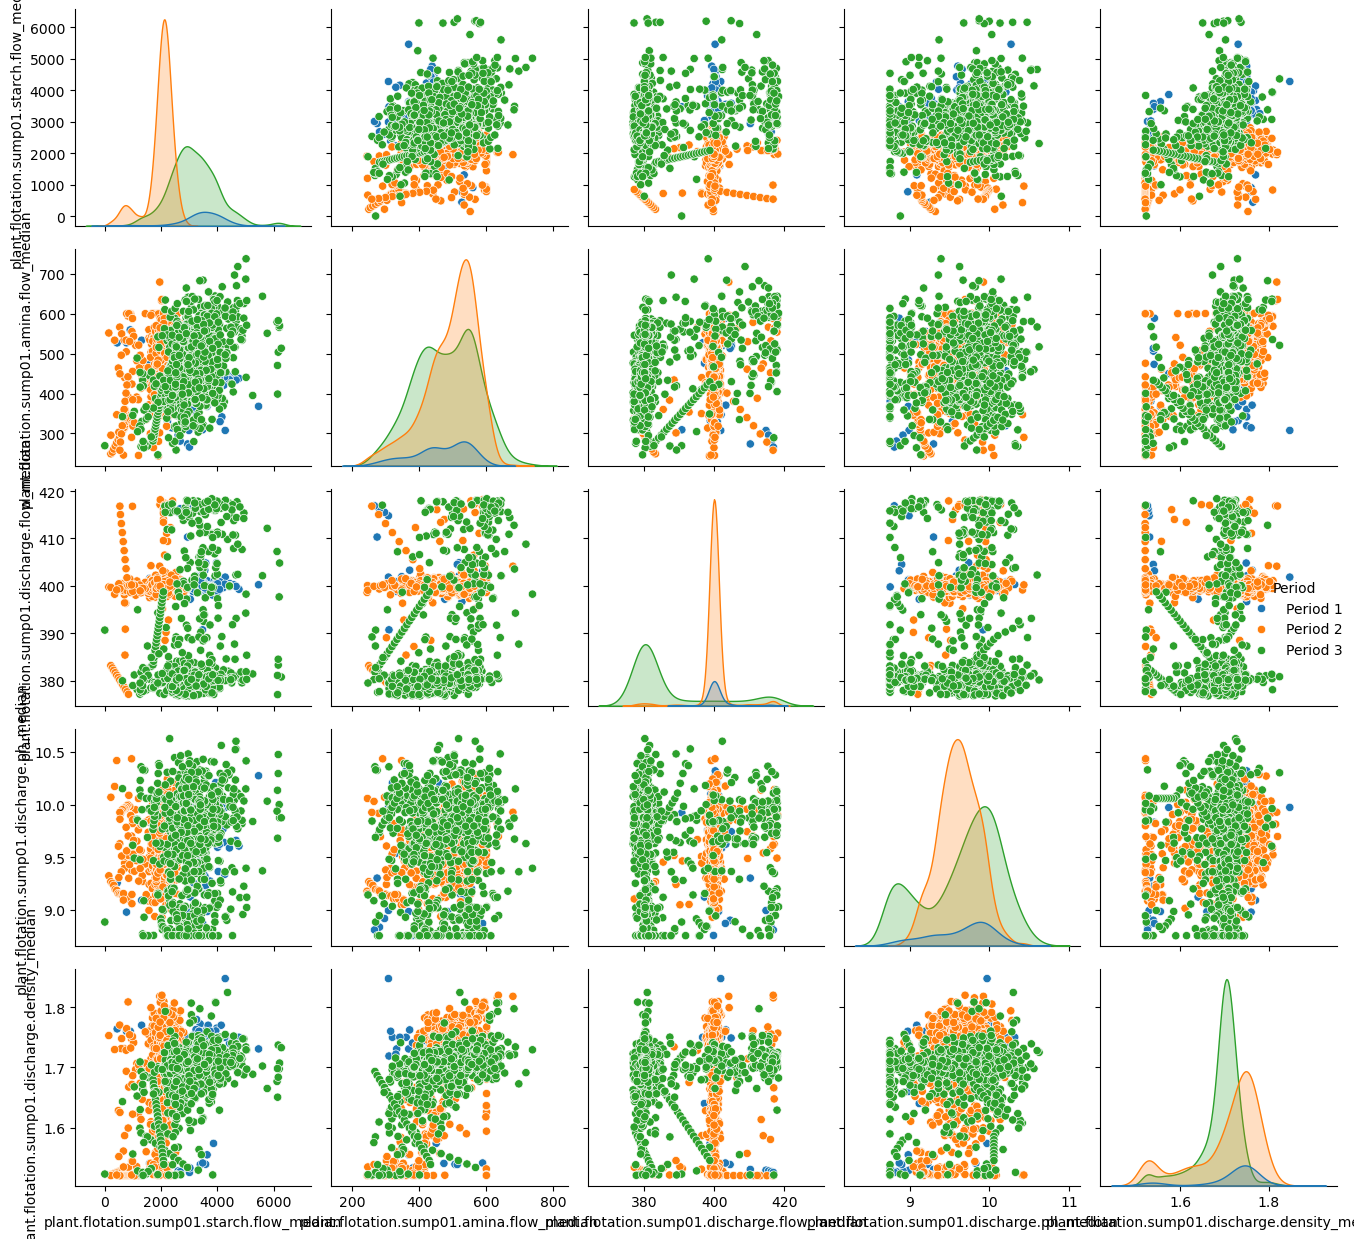

In [27]:
## Pairplots: Overview of all relationships between pairs of variables (continued)
sns.pairplot(downsample_df,vars=Downsampled_feed_variables,hue='Period')
plt.tight_layout()

## Relational behaviour: Correlation plots

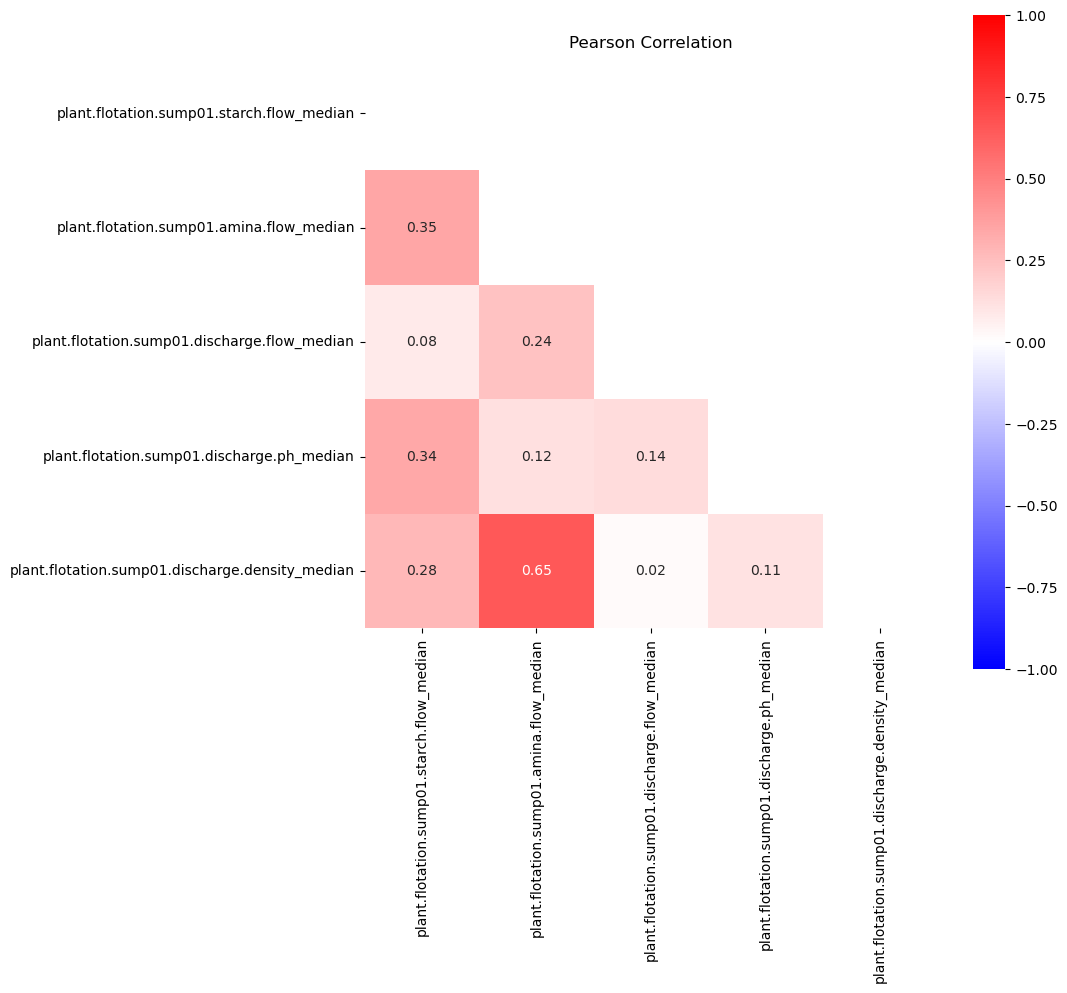

In [28]:
## Correlation plots
# Calculate correlations (Pearson correlation)
corr = downsample_df[Downsampled_feed_variables].corr()
# Round numbers to 2 decimal places, to make it easier to read
corr = corr.apply(lambda x: round(x,2))
# Generate a mask for the upper triangle (i.e. to remove upper triangle and keep view simple)
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 10))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask, square=True, cmap=plt.cm.bwr,annot=True,vmin=-1,vmax=1)
plt.title('Pearson Correlation')
plt.tight_layout()